# IEEE14bus using DPsimLauncher

## Case 1: Different stepp sizes

In [1]:
import sys
#sys.path.insert(0,'/home/mmo/git/Can/dpsim/python/src/dpsim')
#sys.path.insert(0,'/home/mmo/git/Can/dpsim/build')
sys.path.insert(0,'/home/mmo-cya/dpsim/python/src/dpsim')
sys.path.insert(0,'/home/mmo-cya/dpsim/build')
import dpsimpy
from DPsimLauncher import DPsimLauncher

In [2]:
launcher = DPsimLauncher('/home/mmo-cya/dpsim/python/src/dpsim/Config_IEEE14.json')
launcher.start_pf_simulation()
launcher.get_pf_results()

CIM object Diagram created : 1 times
CIM object DiagramObject created : 79 times
CIM object DiagramObjectPoint created : 171 times
CIM object SvPowerFlow created : 17 times
CIM object SvVoltage created : 14 times
CIM object SvTapStep created : 5 times
CIM object SvShuntCompensatorSections created : 1 times
CIM object TopologicalIsland created : 1 times
CIM object TopologicalNode created : 14 times
CIM object ConformLoad created : 11 times
CIM object VoltageLimit created : 14 times
CIM object OperationalLimitSet created : 42 times
CIM object CurrentLimit created : 42 times
CIM object GeographicalRegion created : 1 times
CIM object SubGeographicalRegion created : 15 times
CIM object Terminal created : 73 times
CIM object BusbarSection created : 14 times
CIM object ACLineSegment created : 16 times
CIM object Substation created : 15 times
CIM object GeneratingUnit created : 5 times
CIM object VoltageLevel created : 14 times
CIM object OperationalLimitType created : 3 times
CIM object LoadA

[17:16:32.735186 IEEE14_JSON_PF info] Initialize simulation: IEEE14_JSON_PF
[17:16:32.735884 IEEE14_JSON_PF_PF_Solver warning] Unable to get base voltage at Bus_0006
[17:16:32.735893 IEEE14_JSON_PF_PF_Solver warning] Unable to get base voltage at Bus_0003
[17:16:32.735896 IEEE14_JSON_PF_PF_Solver warning] Unable to get base voltage at Bus_0010
[17:16:32.735900 IEEE14_JSON_PF_PF_Solver warning] Unable to get base voltage at Bus_0004
[17:16:32.735903 IEEE14_JSON_PF_PF_Solver warning] Unable to get base voltage at Bus_0002
[17:16:32.735906 IEEE14_JSON_PF_PF_Solver warning] Unable to get base voltage at Bus_0005
[17:16:32.735910 IEEE14_JSON_PF_PF_Solver warning] Unable to get base voltage at Bus_0009
[17:16:32.735912 IEEE14_JSON_PF_PF_Solver warning] Unable to get base voltage at Bus_0012
[17:16:32.735915 IEEE14_JSON_PF_PF_Solver warning] Unable to get base voltage at Bus_0011
[17:16:32.735917 IEEE14_JSON_PF_PF_Solver warning] Unable to get base voltage at Bus_0014
[17:16:32.735920 IEEE14_

,Bus,V_mag[kV],V_angle[deg],P[MW],Q[MW]
0,Bus_0006,35.3100,-0.2597,-11.2000,41.14280
1,Bus_0003,133.3200,-0.2204,-94.2000,-0.65008
2,Bus_0010,33.9201,-0.2675,-9.0000,-5.80000
3,Bus_0001,139.9200,0.0000,232.5296,-22.86088
4,Bus_0004,135.5735,-0.1811,-47.8000,3.90000
5,Bus_0002,137.9400,-0.0865,18.3000,16.86302
6,Bus_0005,136.4060,-0.1563,-7.6000,-1.59999
7,Bus_0008,11.9900,-0.2349,0.0000,27.69626
8,Bus_0009,33.9253,-0.2632,-29.5000,-16.60000
9,Bus_0012,34.7506,-0.2744,-6.1000,-1.60000


In [3]:
launcher.run_dynamic_simulations()

2.000000e-02: Handle event time
1.000000e-01: Handle event time
2.000000e-02: Handle event time
1.000000e-01: Handle event time


[17:16:32.843369 IEEE14_JSON_SP_TS0.01 info] Initialize simulation: IEEE14_JSON_SP_TS0.01
[17:16:32.843542 MnaSolverFactory info] creating SparseLUAdapter solver implementation
[17:16:32.849990 IEEE14_JSON_SP_TS0.01_Solver warning] Linear solver configuration is not used!
[17:16:32.853742 IEEE14_JSON_SP_TS0.01 info] Scheduling tasks.
[17:16:32.854003 IEEE14_JSON_SP_TS0.01 info] Scheduling done.
[17:16:32.854006 IEEE14_JSON_SP_TS0.01 info] Opening interfaces.
[17:16:32.854007 IEEE14_JSON_SP_TS0.01 info] Start synchronization with remotes on interfaces
[17:16:32.854008 IEEE14_JSON_SP_TS0.01 info] Synchronized simulation start with remotes
[17:16:32.854010 IEEE14_JSON_SP_TS0.01 info] Start simulation: IEEE14_JSON_SP_TS0.01
[17:16:32.854012 IEEE14_JSON_SP_TS0.01 info] Time step: 1.000000e-02
[17:16:32.854014 IEEE14_JSON_SP_TS0.01 info] Final time: 3.000000e+00
[17:16:32.861500 IEEE14_JSON_SP_TS0.01 info] Simulation calculation time: 0.007469
[17:16:32.861926 IEEE14_JSON_SP_TS0.01 info] Sim

2.000000e-02: Handle event time
1.000000e-01: Handle event time


[17:16:32.922053 IEEE14_JSON_SP_TS0.001 info] Initialize simulation: IEEE14_JSON_SP_TS0.001
[17:16:32.922199 MnaSolverFactory info] creating SparseLUAdapter solver implementation
[17:16:32.927942 IEEE14_JSON_SP_TS0.001_Solver warning] Linear solver configuration is not used!
[17:16:32.933441 IEEE14_JSON_SP_TS0.001 info] Scheduling tasks.
[17:16:32.933800 IEEE14_JSON_SP_TS0.001 info] Scheduling done.
[17:16:32.933804 IEEE14_JSON_SP_TS0.001 info] Opening interfaces.
[17:16:32.933805 IEEE14_JSON_SP_TS0.001 info] Start synchronization with remotes on interfaces
[17:16:32.933807 IEEE14_JSON_SP_TS0.001 info] Synchronized simulation start with remotes
[17:16:32.933809 IEEE14_JSON_SP_TS0.001 info] Start simulation: IEEE14_JSON_SP_TS0.001
[17:16:32.933811 IEEE14_JSON_SP_TS0.001 info] Time step: 1.000000e-03
[17:16:32.933814 IEEE14_JSON_SP_TS0.001 info] Final time: 3.000000e+00
[17:16:33.004235 IEEE14_JSON_SP_TS0.001 info] Simulation calculation time: 0.070400
[17:16:33.005162 IEEE14_JSON_SP_TS0

2.000000e-02: Handle event time
1.000000e-01: Handle event time


[17:16:33.203975 IEEE14_JSON_SP_TS0.0001 info] Initialize simulation: IEEE14_JSON_SP_TS0.0001
[17:16:33.204107 MnaSolverFactory info] creating SparseLUAdapter solver implementation
[17:16:33.210068 IEEE14_JSON_SP_TS0.0001_Solver warning] Linear solver configuration is not used!
[17:16:33.214415 IEEE14_JSON_SP_TS0.0001 info] Scheduling tasks.
[17:16:33.214685 IEEE14_JSON_SP_TS0.0001 info] Scheduling done.
[17:16:33.214687 IEEE14_JSON_SP_TS0.0001 info] Opening interfaces.
[17:16:33.214688 IEEE14_JSON_SP_TS0.0001 info] Start synchronization with remotes on interfaces
[17:16:33.214689 IEEE14_JSON_SP_TS0.0001 info] Synchronized simulation start with remotes
[17:16:33.214691 IEEE14_JSON_SP_TS0.0001 info] Start simulation: IEEE14_JSON_SP_TS0.0001
[17:16:33.214693 IEEE14_JSON_SP_TS0.0001 info] Time step: 1.000000e-04
[17:16:33.214695 IEEE14_JSON_SP_TS0.0001 info] Final time: 3.000000e+00
[17:16:33.925585 IEEE14_JSON_SP_TS0.0001 info] Simulation calculation time: 0.710870
[17:16:33.931035 IEEE1

2.000000e-02: Handle event time
1.000000e-01: Handle event time
2.000000e-02: Handle event time
1.000000e-01: Handle event time
2.000000e-02: Handle event time
1.000000e-01: Handle event time


[17:16:34.035778 IEEE14_JSON_DP_TS0.001 info] Initialize simulation: IEEE14_JSON_DP_TS0.001
[17:16:34.035885 MnaSolverFactory info] creating SparseLUAdapter solver implementation
[17:16:34.041077 IEEE14_JSON_DP_TS0.001_Solver warning] Linear solver configuration is not used!
[17:16:34.044633 IEEE14_JSON_DP_TS0.001 info] Scheduling tasks.
[17:16:34.045057 IEEE14_JSON_DP_TS0.001 info] Scheduling done.
[17:16:34.045060 IEEE14_JSON_DP_TS0.001 info] Opening interfaces.
[17:16:34.045061 IEEE14_JSON_DP_TS0.001 info] Start synchronization with remotes on interfaces
[17:16:34.045062 IEEE14_JSON_DP_TS0.001 info] Synchronized simulation start with remotes
[17:16:34.045064 IEEE14_JSON_DP_TS0.001 info] Start simulation: IEEE14_JSON_DP_TS0.001
[17:16:34.045066 IEEE14_JSON_DP_TS0.001 info] Time step: 1.000000e-03
[17:16:34.045068 IEEE14_JSON_DP_TS0.001 info] Final time: 3.000000e+00
[17:16:34.145976 IEEE14_JSON_DP_TS0.001 info] Simulation calculation time: 0.100884
[17:16:34.147967 IEEE14_JSON_DP_TS0

2.000000e-02: Handle event time
1.000000e-01: Handle event time
2.000000e-02: Handle event time
1.000000e-01: Handle event time
2.000000e-02: Handle event time
1.000000e-01: Handle event time
2.000000e-02: Handle event time
1.000000e-01: Handle event time
2.000000e-02: Handle event time
1.000000e-01: Handle event time


mulation: IEEE14_JSON_DP_TS0.0005
[17:16:34.159763 MnaSolverFactory info] creating SparseLUAdapter solver implementation
[17:16:34.163972 IEEE14_JSON_DP_TS0.0005_Solver warning] Linear solver configuration is not used!
[17:16:34.167495 IEEE14_JSON_DP_TS0.0005 info] Scheduling tasks.
[17:16:34.167955 IEEE14_JSON_DP_TS0.0005 info] Scheduling done.
[17:16:34.167958 IEEE14_JSON_DP_TS0.0005 info] Opening interfaces.
[17:16:34.167960 IEEE14_JSON_DP_TS0.0005 info] Start synchronization with remotes on interfaces
[17:16:34.167961 IEEE14_JSON_DP_TS0.0005 info] Synchronized simulation start with remotes
[17:16:34.167962 IEEE14_JSON_DP_TS0.0005 info] Start simulation: IEEE14_JSON_DP_TS0.0005
[17:16:34.167964 IEEE14_JSON_DP_TS0.0005 info] Time step: 5.000000e-04
[17:16:34.167966 IEEE14_JSON_DP_TS0.0005 info] Final time: 3.000000e+00
[17:16:34.360853 IEEE14_JSON_DP_TS0.0005 info] Simulation calculation time: 0.192865
[17:16:34.365157 IEEE14_JSON_DP_TS0.0005 info] Simulation finished.
[17:16:34.3804

2.000000e-02: Handle event time
1.000000e-01: Handle event time


[17:16:35.433160 IEEE14_JSON_EMT_TS0.001 info] Initialize simulation: IEEE14_JSON_EMT_TS0.001
[17:16:35.433249 MnaSolverFactory info] creating SparseLUAdapter solver implementation
[17:16:35.440942 IEEE14_JSON_EMT_TS0.001_Solver warning] Linear solver configuration is not used!
[17:16:35.448456 IEEE14_JSON_EMT_TS0.001 info] Scheduling tasks.
[17:16:35.448799 IEEE14_JSON_EMT_TS0.001 info] Scheduling done.
[17:16:35.448801 IEEE14_JSON_EMT_TS0.001 info] Opening interfaces.
[17:16:35.448803 IEEE14_JSON_EMT_TS0.001 info] Start synchronization with remotes on interfaces
[17:16:35.448804 IEEE14_JSON_EMT_TS0.001 info] Synchronized simulation start with remotes
[17:16:35.448805 IEEE14_JSON_EMT_TS0.001 info] Start simulation: IEEE14_JSON_EMT_TS0.001
[17:16:35.448807 IEEE14_JSON_EMT_TS0.001 info] Time step: 1.000000e-03
[17:16:35.448810 IEEE14_JSON_EMT_TS0.001 info] Final time: 3.000000e+00
[17:16:35.614890 IEEE14_JSON_EMT_TS0.001 info] Simulation calculation time: 0.166066
[17:16:35.616124 IEEE1

2.000000e-02: Handle event time
1.000000e-01: Handle event time
2.000000e-02: Handle event time


[17:16:35.644367 IEEE14_JSON_EMT_TS0.0005 info] Initialize simulation: IEEE14_JSON_EMT_TS0.0005
[17:16:35.644450 MnaSolverFactory info] creating SparseLUAdapter solver implementation
[17:16:35.651944 IEEE14_JSON_EMT_TS0.0005_Solver warning] Linear solver configuration is not used!
[17:16:35.659549 IEEE14_JSON_EMT_TS0.0005 info] Scheduling tasks.
[17:16:35.659914 IEEE14_JSON_EMT_TS0.0005 info] Scheduling done.
[17:16:35.659917 IEEE14_JSON_EMT_TS0.0005 info] Opening interfaces.
[17:16:35.659918 IEEE14_JSON_EMT_TS0.0005 info] Start synchronization with remotes on interfaces
[17:16:35.659919 IEEE14_JSON_EMT_TS0.0005 info] Synchronized simulation start with remotes
[17:16:35.659921 IEEE14_JSON_EMT_TS0.0005 info] Start simulation: IEEE14_JSON_EMT_TS0.0005
[17:16:35.659923 IEEE14_JSON_EMT_TS0.0005 info] Time step: 5.000000e-04
[17:16:35.659926 IEEE14_JSON_EMT_TS0.0005 info] Final time: 3.000000e+00
[17:16:36.010505 IEEE14_JSON_EMT_TS0.0005 info] Simulation calculation time: 0.350562
[17:16:36

1.000000e-01: Handle event time


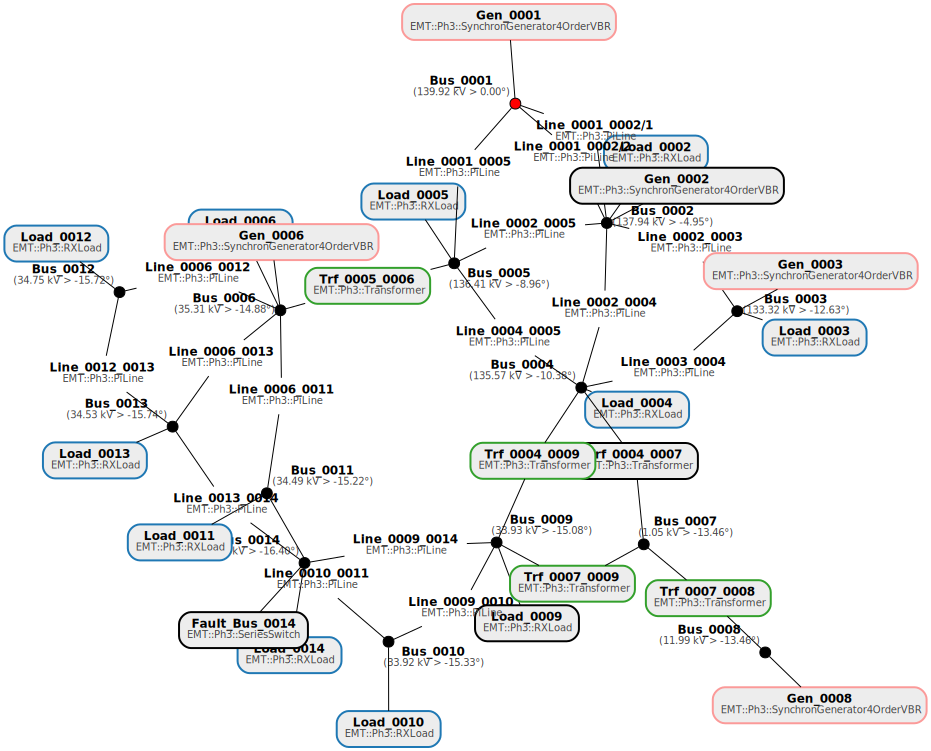

In [4]:
launcher.system

### Plot results

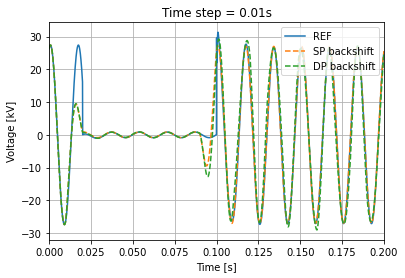

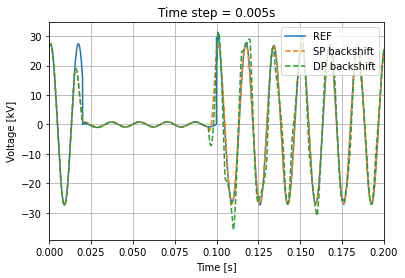

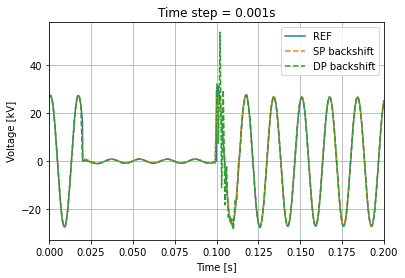

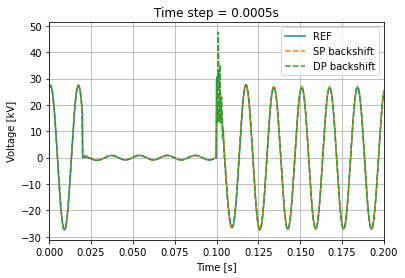

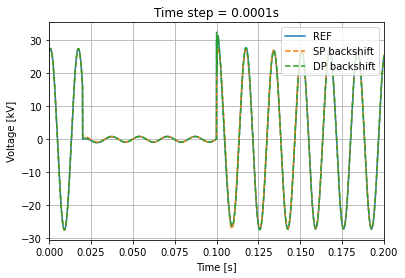

In [6]:
from villas.dataprocessing.readtools import *
from villas.dataprocessing.timeseries import *
import matplotlib.pyplot as plt

var_name = 'Bus_0014.V'
timestep = 1e-6


ts_ref_simulation = None
for elem in launcher.get_path_to_results():
    if (elem["TimeStep"]==1e-4):
        for idx, domain in enumerate(elem["Domain"]):
            if domain=="EMT":
                ts_ref_simulation = read_timeseries_csv(elem["Path"][idx], print_status=False)
        
for elem in launcher.get_path_to_results():
    plt.figure()
    plt.title('Time step = {}s'.format(elem["TimeStep"]))
    plt.xlabel("Time [s]")
    plt.ylabel("Voltage [kV]")
    plt.xlim([0,0.2])
    plt.plot(ts_ref_simulation[var_name+"_0"].interpolate(timestep).time, ts_ref_simulation[var_name+"_0"].interpolate(timestep).values/1000, label='REF')
    for idx, domain in enumerate(elem["Domain"]):
        ts_dpsim = read_timeseries_csv(elem["Path"][idx], print_status=False)
        if domain=="EMT":
            #plt.plot(ts_dpsim[var_name+"_0"].interpolate(timestep).time, ts_dpsim[var_name+"_0"].interpolate(timestep).values/1000, label='{}'.format(domain))
            pass
        else:
            plt.plot(ts_dpsim[var_name].interpolate(timestep).time, np.sqrt(2/3)*ts_dpsim[var_name].interpolate(timestep).frequency_shift(60).values/1000, '--', label='{} backshift'.format(domain))
    plt.legend(loc="upper right")
    plt.grid()


### Export to CIM

In [ ]:
import cimpy
from cimpy.DPsim2CIM import DPsimToCIMpy

cim_topo = DPsimToCIMpy(launcher.system_pf, launcher.sim, launcher.system, frequency=60)
activeProfileList = ['SV', 'EQ', 'TP', 'DY']
cimpy.cim_export(cim_topo, 'test3', 'cgmes_v2_4_15', activeProfileList)